# Graph Lab

## Header information:

  - Author #1: Housam Alamour (alamourh@mcmaster.ca)
  - Author #2: Saina Seddigh (seddighs@mcmaster.ca)
  - Gitlab URL: https://gitlab.cas.mcmaster.ca/alamourh/l-1-graph-lab-g-35
  - Avenue to Learn group name: G35

In [103]:
''' NOTES FROM OFFICE HOURS

# use different heurisitc
# heurisit may not make algo better
# why did this not work? how to fix.
#

side note, if we have time we should add a way to change the file path for MetricExtractor FormatC '''

' NOTES FROM OFFICE HOURS\n\n# use different heurisitc\n# heurisit may not make algo better\n# why did this not work? how to fix.\n#\n\nside note, if we have time we should add a way to change the file path for MetricExtractor FormatC '

Introduction

We began the project by placing our code in a single python file with all the classes and methods. Soon we realized that this method of organization was not readable or maintainable. To better encapsulate our code and prevent unnecessary coupling as a result of having access to implementation details of all classes and respect the concept of separation of concerns, we decided to organize our different classes into different files and create various modules that were concerned with a single responsibility. As a result, we created the following interfaces: edgeInterface, graphInterface, itineraryInterface and SP_AlgorithmInterface. We also created the following modules, some of which implement the interfaces mentioned above:  Graph.py, GraphBuilder.py, degree_grapher.py, SP_Algorithms.py, MetricExtractor.py, Itinerary.py, datasetGen.py, benchmarking.py, test_sptest.py.  


Design choices 

graphInterface and buildGraph:
    The graphInterface is an abstract class with a constructor with adjacency list and edge size that are empty and have a value of zero, respectively. The edge_size() function is implemented in this abstract class as all graphs share this function and would return the number of edges that the graph contains. There are a variety of abstract methods in this class that different concrete graph classes can implement based on what attributes the graph has. For instance, our buildGraph class in the Graph.py module implements the graphInterface and extends the code so that abstract functions like add_edge and vertices_size can be implemented based on how we needed our graph to implement these functions. This is a suitable design choice as our current graph structure is designed for an undirected graph but by having an abstract class, our code can be extended to directed graphs, as well. In other words, by having an abstract class, we ensured that our code was closed for modification and open for extension. This way, if there is a need to have a different implementation for a graph, the abstract class can easily be implemented to fit the new implementation. Furthermore, our buildGraph implementation also quantifies the graph based on its number of nodes, number of edges as well as the average degree of the nodes. If more metrics were to be added, the abstract class could be easily extended to implement more methods. 

edgeInterface and Edge:
    The edgeInterface is another abstract class with different abstract methods that are implemented in the Edge class. The edge abstract class’ constructor defines an edge as a connection between two nodes and has two abstract methods for getting each of the nodes involved. Our Edge class implements edgeInterface but also further extends it so that other properties such as edge weight and line can also be added to an edge. This design allows us to extend the code in however way we see fit based on our needs but ensures that the basic definition of an edge (the fact that it is a connection of two nodes) is respected regardless of the implementation. 

MetricExtractor: 
    As a creational design pattern, abstract factory pattern provides an interface for creating objects in a superclass but allows subclasses to alter the type of objects that’ll be created. This is applicable to our metricExtractor design as it allows us to decouple our code from the format of the CSV file. The ExtractorMaker class implements a ExtractorFactory abstract class and chooses what type of format the inputs in the CSV file are in and creates an object of that format type. This pattern is useful when we want to instantiate one of many classes of different CSV formats that share the ExtractorFactory class but we don’t know ahead of time which format the CSV will be in. Through having an Extractors abstract class and having different formats implementing it, we are enforcing the open closed principle as the Extractors are easily extendable but the parent classes are closed for modification. The factory pattern effectively encapsulates object creation and allows for changes to propagate. Additionally, it ensures single responsibility as the task of object creation based on a specific format is separated from the file reading tasks. 

SP_AlgorithmInterface and SP_Algorithms: 
    The SP_AlgorithmInterface has abstract methods including run(), returnNodesAndPath() as well as print_result(). Through having an abstract class we enforce that any algorithm that implements this abstract class has to have the mentioned methods implemented. The SP_Algorithms module contains our shortest path algorithms, dijkstra and astar. Djikstra implements the abstract class SP_AlgoritmInterface and returns the shortest path. Our aStar class extends dijkstra to make the code more modular and uses the geographical location of the stations as its heuristic. In order to make this possible, we made a heuristicType class that uses pythagorean theorem as well as the formula for distance on the latitude and longitude of the stations. This heuristic is used in addition to the weight of the edges in order to find the shortest path. We made sure that the aStar algorithm extended Dijkstra’s algorithm in order to avoid repetition in our code and as an attempt to make the code more readable as both algorithms had the same print_result  and returnNodeAndPath functions. Through making the heuristic its own separate class, we are separating the responsibility of heuristic calculation from the actual aStar algorithm. This way of implementation allows other heuristics to be implemented that can still be used within the aStar algorithm without any changes to the algorithm itself. The separation of the heuristic from aStar allows us to follow the separation of concerns principle. 

Degree_grapher:  
	The degree_grapher class uses the matplotlib library in python to graph the degree distribution of the graph. It has two functions for finding the max_degree in order to figure out the range of the x-axis as well as a make_graph function for graphing the result. The simple make_graph function traverses our adjacency list and keeps track of the length of each node’s adjacent edges. It then counts how many nodes have each of the degrees and appends them to a list of y_axis values. We then plot the x_axis and y_axis. 

ItineraryInterface and Itinerary:
    The itineraryInterface is an abstract class with countStations and returnStations implemented. The interface can be extended later on if a new type of Itinerary is required. For example maybe the path has shops open on the way that can be visited. Because we made the itinerary an interface, it can be extended to add these features without having to modify any code further down the pipeline. This allows us to abide by the SOLID open closed principle for extendibility.

datasetGen and Benchmarking:
    datasetGen uses the MetricExtractor and randomly selects two stations from the graph. The benchmarking class uses the datasetGen class as well as the GraphBuilder and SP_Algorithms classes. We have made our benchmarking function such that for each of our algorithms, it measures the execution time separately. Since the nodes are randomly chosen and are consistent for both algorithms, we have a consistent dataset for both algorithms which would give us a reliable result for our benchmarking. 




UML1 (week1 accomplishments)
	As previously mentioned, our code had an entirely different structure in week1. We had implemented our code such that all our classes were highly coupled to each other and there was no abstraction involved in our project. Initially, the implementation of our input_reader (metricExtractor) was highly dependent on the format of the input file that was passed into each of the functions in the input_reader class and each function was designed for reading a specific part of the file. The high dependency of each component of our code can be seen in the UML diagram that we made initially when we started working on this project. 


![UML1](UML1.png)

UML2 (week2 and week3 )
  	As it can be seen in the second UML diagram, we were able to revise our code to be a lot more modularized and less dependent. We implemented general abstract classes and interfaces for our graph, edge, itinerary and shortest path algorithm classes. As mentioned earlier, this abstraction allows us to follow the open-closed principle and the dependency inversion principle as the higher level modules would not depend on lower level modules and each abstract class can be implemented in a variety of different ways, depending on what the developer sees fit. This allows our code to be open for extension and closed for modification. As evident in the UML diagram, we decided to use a factory pattern for the metric extractor which is a very different implementation from what we initially had. Instead of having different input readers for all the different graph properties, we have different format classes that implement the extractor interface. Through the use of this pattern, depending on what properties are needed or what format the CSV file is in, a new format class can be made and the format can be chosen at runtime. This implementation makes the code modular and less dependent on the format of the CSV file. Furthermore, as it can be seen in the second UML diagram, we realized that aStar and dijkstra use similar functions and perform similarly. Thus, we decided to make aStar inherit from dijkstra which makes the code a lot more readable and easier to understand. Furthermore, the heuristic is in its own class and there is an aggregation relation between heuristic and aStar as aStar has a heuristic type. Heuristic type can exist without aStar. Having heuristicType in a different class ensures single responsibility and allows for the possibility of having a different heuristicType for aStar.  


![UML2](UML2.png)

Challenges

One of the main challenges we faced was that upon starting the lab, we did not take into account the line, zone, latitude and longitude of each station when creating our adjacency list data structure. It was only after implementing our Djikstra’s algorithm that we realized that we are required to add those attributes of stations as well. This caused us to have to go back and try to implement a way of keeping track of all the information from the CSV file and not just the connections and edge weights. This ended up being a challenge due to us using a dictionary and being unable to effectively add the attributes to the adjacency list. 
	
Furthermore, we struggled with modularizing our code in the beginning and it took us some time to figure out how to properly organize our code so responsibilities were separated in accordance to SOLID principles. For instance, we had to revise our metricExtractor code multiple times to ensure that the CSV file format was not a factor in our implementation. 
	
Another significant issue that we had was with our very first implementation of adjacency list that would only add the edges one way and not the other. For instance if there was a connection between stations 11 and 104, it would only add an edge in key 11 of the adjacency list and not in key 104. In other words, we were having trouble trying to make our graph undirected. 
	
Another challenge that we faced was with finding the degree of each of the stations. Initially, our code would successfully graph the degrees and the number of stations with the corresponding degrees. However, upon further testing and referencing the CSV input files manually, we realized that that maximum degree was 12 and not 7 as our code was outputting. Through debugging and further inspection, we realized that our edges were being compared based on our __eq__ method as they are objects which resulted in our adjacency list to not add the edges between stations that had different lines. 


Future directions

Strategy pattern for the algorithms:

As a behavioral design pattern, strategy pattern is used to define a family of algorithms. In our lab, we are concerned with two algorithms for finding the shortest path, Djikstra and A*. Without this pattern, every time a new algorithm is added, the main class containing the algorithms would increase in length and with every change made in this large class, the chances of creating an error would have been high. The strategy pattern puts each of these algorithms in separate classes that implement a parent family that contains aspects that are shared by all the algorithms. Each strategy concrete subclass focuses on a single responsibility and encapsulates the algorithm. It also reinforces the open close principle as it allows one to add new strategies without modifying the pre-existing code. It also allows one to swap algorithms used inside an object at runtime. Furthermore, strategy pattern decouples the algorithms involved and their lower level concerns from the higher level logic. We have a similar format for our code right now, except we don’t have the means to switch algorithms at runtime as we would have had if we used a strategy pattern. 
    
Timing:

As a team, we struggled with timing and ensuring that we completed all the weekly tasks on time. This prevented us from finishing the connected components and TSP code as we were too focused and stuck on week1 components. In the future, we should be more mindful of the time it takes us to perfect our code and better manage our time to ensure that we present the best work possible. 
    
Heuristics:

Making a heuristic interface and allowing other future developers to implement the heuristic based on whatever graph attribute they wanted would have made the code modular even more. 

Work distribution
Saina:
    - Degree grapher class
    - Factory pattern for metric extractor class
    - Design choice, challenges and future directions section of the report
    - datasetGen class
    - Benchmark_Setup class within the benchmarking file 
    - UML diagrams 
    - Graph.py file 
    - GraphBuilder.py file 

Housam: 
    - Interfaces
    - Dijkstra and aStar implementation in SP_algorithms class 
    - Itenary class
    - Cycle, benchmark functions, GraphResults functions within the benchmarking file   
    - benchmark_Setup_Itinerary class within the benchmarking file 
    - Tests 
    - Jupyter notebook 
    - Graph.py file 
    - GraphBuilder.py file 



![figure1_ExecutionTime](Figure_1.png)

![figure2_connections](Figure_2.png)


Benchmarking Analysis


Execution time (Dijkstra vs A Star):

Through analysis of our benchmark results, we can make a few observations. First off, Our A star algorithm is quite a bit slower in terms of execution time than our Dijkstra’s algorithm. This result seems weird as one would expect A* to be faster. However upon further analysis, we realized that our implementation resulted in some unexpected slowdowns. When we read in the station's csv file, we output the results into a tuple. This list is then read in by the A* algorithm and converted into a dictionary to be able to easily find the longitude and latitude of each station for heuristic calculations. This causes slowdowns as each time A* is called, it must create that dictionary. This slowdown could be dealt with if we read the station's csv file directly into a dictionary. The reason we did not do that is because we wanted our code to follow the Liskov Substitution Principle. In particular, the extractor method. We did not want the extractor that reads in the station file to be very different from the connections extractor, as this would lead to confusion later on if we wanted to extend that class. Further, reading the stations directly into a dictionary would limit what we could do with our lab later on in terms of finding zones for Week 2: Urbanism Planning. 


Number of Lines Changes (Dijkstra vs A Star):

In our Benchmark about the number of lines used by each algorithm, we see that Dijkstra’s uses less lines the more paths we test. This result tells us that our implementation of A Star has some problem with it as the expected result is that A star would have less line changes needed, since it would find a faster path. I suspect that our implementation has an issue with the heuristic, as it is not having enough of an effect to have A star find a shorter path. The heuristic values are very small because they are calculated using distances of longitude and latitude which are in the magnitude of 10^-2, as compared to the line weights which have magnitudes in the range of 1 to 3. Thus one way to fix this would be to scale the heuristic value so that it does affect the result when trying to relax an edge and thus change the A star path.


Self Reflection: Saina

Backward: Have you done a similar kind of work in the past?
	In the past, I have worked on similar projects that were focused on software design principles. More specifically, for an assignment in the second year software development course (SFWRENG 2AA4), we were given multiple functional java files for making a game that we were supposed to make more maintainable and modularized. This goal was achieved by applying design patterns and SOLID principles to the pre-existing code. From that project, I learned the importance of applying appropriate design patterns such as decorator, factory and strategy patterns and to be mindful of design principles such as the single responsibility principle, the open-closed principle and dependency inversion. I also learned how to create UML diagrams as they are great tools that provide one with a better understanding of the appropriate framework that must be followed. Similar to that assignment, the graph lab also required me to think about ways to make my code open for extension but closed for modification and to divide different responsibilities amongst different classes to ensure single responsibility. Furthermore, through the use of interfaces, similar to the 2AA4 assignment, I was able to enforce interface segregation and to ensure that users were not forced to implement unnecessary methods that would not be used in the future. Additionally, the use of the factory design pattern for the metric extractor in the graph lab as well as the idea of using strategy pattern for the algorithms was as a result of past experiences with implementing these patterns in the mentioned 2AA4 assignment. Both assignments required critical thinking to analyze and determine the best way to design our program such that not only all components and classes work well separately but that they can be used together to deliver the final result that we are looking for. 

Inward How do you feel about this piece of work? What parts do you particularly like?
Dislike? Why?
	As this was our very first lab in SE 3XB3, I feel like there are many aspects that I’m personally proud of and many aspects that I feel have room for further improvement. I think we did a good job on extracting data from the CSV file and the use of the factory pattern was wise as it allows us to adapt the code based on the format of the CSV file. The process of designing the metric extractor was interesting as the end result was very different from how we first had implemented and envisioned it to be. To further elaborate, we initially had designed the metric extractor to read information from pre-defined and hard coded headers from the CSV file. However, after collaborating and critically thinking about the problem of our code depending too closely on the format of the CSV file, we decided that it would be best to make our design more dynamic and with the use of the factory pattern, it is possible to create different extractor formats by implementing an extractor abstract class and choosing the format of the file at runtime.    Also, I believe that our adjacency list data structure for building the graph was well done. I, however, dislike that we did not take into account all the information we needed to store in our adjacency list in week1. In week1, we had only thought that having the connected stations as well as the time (weight) between the stations is sufficient. Later, we realized that other information such as the line, latitude and longitude as well as the zones were also relevant and adding those layers to our adjacency list (which was especially necessary for the heuristic of our aStar algorithm) proved to be challenging. Another aspect of the project that I wish we could have implemented was a strategy pattern for the shortest path algorithms that we implemented.As of right now, we still have designed our shortest path algorithms to be as abstract as possible through creating a SP_algorithm interface that is implemented by the djikstra_alg class. aStar also extends the djikstra_alg class as a means to avoid repetition and to only add a heuristic to djikstra_alg. I believe, however, that a better implementation would have been through using the strategy pattern. This lab brought me to the understanding that coding and engineering are very different from each other. 
	 
Outward What is the one thing you particularly want people to notice about your work?
	I would like others to notice how much thought and effort was put into developing this project. We faced many challenges and spent a long time debugging every piece of our code in order to ensure that our code works as expected. I would like people to notice that we have tried to organize our code in an attempt to enforce single responsibility for our classes. The functionality of our graph and edge classes is also something that I would like others to notice. This is because any information that we might need to access is easily accessible through the functions we have written for those two classes. 


Forward What would you change if you had the chance to do this project over again?
	I would definitely want to improve upon my time management skills as I found it very difficult to stay on track with all the weekly tasks. I believe that this project was a lot heavier and more intense than the projects I have previously been involved in. Therefore, it was a different experience that I found overwhelming. I am looking at this project as a learning experience that has taught me to deal with stress and how to be productive. I would like to apply the lessons that I have learned with regards to my working habits in my future projects. Moreover, if I could do this project again, I would make sure to read about the future tasks ahead of time to avoid the challenge of trying to add on and modify already existing and functional components of our design. For instance, we struggled with creating the heuristic class for aStar because we did not have the longitude and latitude of each station stored in our adjacency list. After a few days of struggling and thinking, we came up with the idea of creating a separate dictionary of all the nodes and their geographical location. This idea worked pretty well with our design. Furthermore, I would also try to collaborate more with my partner and enhance my communication skills in order to better divide up tasks amongst ourselves. This way we would ensure that the project progresses faster and more effectively. 


Self Reflection: Housam

Backward: Have you done a similar kind of work in the past?
	In previous project-focused courses such as 1P13 and 2PX3, I worked on similar large scale projects that spanned multiple weeks of work. In 1P13, I worked in a group of four members to develop a robotic arm that picks up cans and sorts them in a recycling container. We developed our program using python very similar to this course. However in that course, there were simple modules we would complete weekly that guided us on how to complete the weekly task. In contrast, this lab was much more open ended in the way we approached the solution. This required us to do more research into potential solutions rather than working towards a single solution. 
	In 2PX3, we worked on developing a new intersection design that supports autonomous vehicles. For this project, I had the option to choose what language I would work with. I chose Java, as this allowed me to implement all the SOLID principles and design patterns I was learning about in my 2AA4 course. After reflecting on that project, I learned the importance of SOLID principles. I had to abide strictly by single responsibility for methods that created a vehicle instance, placed it in the simulation environment, cycled the traffic light, and ran the whole simulation. This is very similar to how we had to separate responsibility of being a graph, extracting graph information, and making a graph in this lab. In 2PX3 I learned about the importance of the open close principle by making the vehicle class extendable to include traditional vehicles, autonomous vehicles and even cyclists. Similar to how in 3XB3 we made the Dijkstra SP algorithm extendable so that A Star could implement it and we would not have repeated code.


Inward How do you feel about this piece of work? What parts do you particularly like?
Dislike? Why?
	Personally I feel like this lab was a massive learning experience. There were many up and down moments throughout the development of this lab. Me and my partner learned about the absolute necessity of keeping code readable. This means keeping it clean, concise and separating constraints. Initially, me and my partner did not realize the importance of these concepts. However further on in the lab we realized how much more effort we needed to put in to fix imports, files, looking for specific lines of code that were hidden among other lines. Upon reflection, my partner and I realized that had we focused on making our code readable, it would have made our lives easier later on in this lab, even if it would have taken a bit more time to develop initially it would pay back dividends later on. 
	Further on, we finally came upon a big realization, that coding and software engineering are two completely different spaces. Trying to engineer our code so that it worked well together and did not encounter any errors took much more than python coding prowess. It required many visits back to the drawing board to reflect upon our current implementation to understand how we would tackle the next challenge presented by this lab or how we would go back and redesign a previous part to fix a problem we were currently facing in our code. 
	I particularly liked how many different ways we had to approach this problem, not letting us be cornered into a single implementation and allowing it to explore different strategies that suited our needs and strengths in terms of engineering and programming. I also liked our implementation of the dijkstra's algorithm, and how our A Star algorithm simply extends it. One thing I disliked is how our A star has a longer execution time than dijkstra's algorithm. This comes down to our implementation and how we create a dictionary for the nodes and lines from the list we read from the stations.csv file every time we run our code. One way to improve this would be to read the csv directly into a dictionary then pass that to our A star algorithm, rather than creating the dictionary inside our algorithm. The reason we did not do that is because we wanted our code to follow the Liskov Substitution Principle. In particular, the extractor method. We did not want the extractor that reads in the station file to be very different from the connections extractor, as this would lead to confusion later on if we wanted to extend that class. Further, reading the stations directly into a dictionary would limit what we could do with our lab later on in terms of finding zones for Week 2: Urbanism Planning.

Outward What is the one thing you particularly want people to notice about your work?
	One thing I want people to notice about our work is something that is unseen. It is the amount of refactoring that went into our code. There were so many revisions to make the code more readable and extensible later on. People should notice the lesson learned about the evils of hardcoding solutions into your projects. One major instance of this was our implementation of Dijkstra. In week one, our implementation of dijkstra worked, however it relied on a specific implementation of priority queues. This was not a problem until we began developing the A star algorithm. This proved very time consuming to debug thus we decided to go back and redevelop Dijkstra's algorithm from scratch while keeping our graph structure intact. This required a huge amount of effort to integrate the two implementations, but in the end it was worth it once all our code ran smoothly.

Forward What would you change if you had the chance to do this project over again?
	I have no regrets about the way this lab came out. All the mistakes made were important lessons for our growth and improvement as software engineers. However, one major thing I would change about this lab if I went back with the knowledge I have now is to plan and set up our environment before beginning to code. Many of our roadblocks during this lab came from problems with our Python environments, like modules not working (pytest, converge), the pyenv virtual environment not working, Jupityr notebook not being set up properly. I would also spend more time planning our approach to problems and how different parts of our lab solution would interact with each other. For example, what the metric extractor would return and how that would be passed to the graph builder and finally how that would be used by the SP algorithm to find a path and pass that to the itinerary class. All these interactions need to be taken into account, and we should never develop any of these parts in isolation. This is where the importance of abstraction comes in, and allowing us to extend different implementation so that our code can adapt to what we need it to output depending on the algorithm we are currently developing, like our graph being able to give us all the adjacent edges to a station so we can run dijkstras and A star.

In [104]:
#Interfaces
from abc import ABC, abstractmethod


class edgeInterface(ABC):
    def __init__(self, start, end):
        self.start = start
        self.end = end
    
    @abstractmethod
    def either(self):
        pass
    @abstractmethod
    def other(self, other):
        pass

class graphInterface(ABC):
    def __init__(self, graph=None):
        self._adj = []
        self._edges_size = 0

    def edges_size(self):
        return self._edges_size

    @abstractmethod
    def vertices_size(self):
        pass

    @abstractmethod
    def add_edge(self, edge):
        pass

    @abstractmethod
    def adjacent_edges(self, vertex):
        return self._adj[vertex]

    @abstractmethod
    def vertices (self):
        pass
    @abstractmethod
    def edges(self):
        pass

    def nodes_size(self):
        return len(self.vertices())


class itineraryInterface(ABC):
    def __init__(self, start, end):
        self.start = start
        self.end = end
        stationsOnRoute = []

    def findRoute(self):
        pass

    def countStations(self):
        return len(self.stationOnRoute)

    def returnStations(self):
        return self.tationsOnRoute


class SP_AlgorithmInterface(ABC):
    def __init__(self):
        pass
    @abstractmethod
    def run(self):
        pass

    @abstractmethod
    def returnNodesAndPath(self):     
        pass
    
    @abstractmethod
    def print_result(self):
        pass



In [105]:
#Edge and Graph Implementation
import copy
from collections import defaultdict


class Edge(edgeInterface):
    
    def __init__(self, station1, station2, weight, line=0):
        self.station1 = station1
        self.station2 = station2
        self._weight = weight
        self._line = line


    @property
    def weight(self):
        return self._weight
    @weight.setter
    def weight(self, weight):
        self._weight = weight

    @property
    def line(self):
        return self._line
    @line.setter
    def line(self, line):
        self._line = line

    def either(self):
        return self.station1

    def other(self, vertex):
        if vertex not in (self.station1, self.station2):
            return None

        return self.station1 if vertex == self.station2 else self.station2

    def __repr__(self):
        return "{}-{} {} line:{}".format(self.station1, self.station2, self.weight,self.line)

    def __eq__(self, other):
        return self._weight == other._weight and self._line == other._line 

    def __lt__(self, other):
        return self._weight < other._weight

    def __le__(self, other):
        return self._weight <= other._weight

    def __hash__(self):
        return hash('{} {} {}'.format(self.station1, self.station2, self._weight))

    def equalLine(self, other):
        if self._line == other.line: 
            return True
        return False


class buildGraph(graphInterface):
    def __init__(self, graph=None):
        self._adj = defaultdict(set)
        self._edges_size = 0
        self._vertices = set()

        
        if graph:
            self._vertices = set(v for v in graph.vertices())
            self._edges_size = graph.edges_size()
            self._adj = copy.deepcopy(graph._adj)

    def edges_size(self):
        return self._edges_size

    def vertices_size(self):
        return len(self._adj.keys())

    def add_edge(self, edge):
        station1 = edge.either()
        station2 = edge.other(station1)
        if edge not in self._adj[station1] and edge not in self._adj[station2]:
            self._adj[station1].add(edge)
            self._adj[station2].add(edge)
            self._vertices.add(edge.station1)
            self._vertices.add(edge.station2)
            self._edges_size +=1
        else:
            pass

    def adjacent_edges(self, vertex):
        return self._adj[vertex]

    def vertices (self):
        return self._adj.keys()
    
    def edges(self):
        result = set()
        for v in self.vertices():
            for edge in self.adjacent_edges(v):
                if edge.other(v) != v:
                    result.add(edge)
        return result

    def nodes_size(self):
        return len(self.vertices())

    def __repr__(self):
        print_string = '{} vertices, {} edges.\n'.format(
            self.vertices_size(), self.edges_size())
        for v in self.vertices():
            try:
                lst = ', '.join([vertex for vertex in self._adj[v]])
            except TypeError:
                lst = ', '.join([str(vertex) for vertex in self._adj[v]])
            print_string += '{}: {}\n'.format(v, lst)
        return print_string
    def averageDegree(self):
        sum = 0 
        for v in self.vertices:
            sum = sum + len(self.adjacent_edges(v))
        return sum/self.num_of_nodes()


In [106]:
class Itinerary(itineraryInterface):
    def __init__(self, routeStations, time, graph: buildGraph):
        self._time = time
        self._NumOfStations = 0
        self._connectionCount = 0
        self._routeStations = routeStations
        self._graph = graph


        self._NumOfStations = self.countStations()
        self._connectionCount = self.countConnections()


    

    #Getters and setters
    @property
    def routeStations(self):
        return self._routeStations
    @property
    def time(self):
        return self._time
    @property
    def connectionCount(self):
        return self._connectionCount
    @connectionCount.setter
    def connectionCount(self, connectionCount):
        self._connectionCount = connectionCount



    def countStations(self):
        return len(self._routeStations)

    def returnEdges(self):
        return self._routeStations

        # Get the list of all lines travelled upon for this path
    def getConnections(self):
        linesUsed = []
        for station in range(1, len(self._routeStations)):
            station1 = self._routeStations[station]
            station2 = self._routeStations[station-1]

            station1AdjList = self._graph.adjacent_edges(station1)

        
            for i in station1AdjList:
                if i.other(station1) == station2:
                    linesUsed.append(i._line)
        return linesUsed

    def switchLine(self, edgeLine1, edgeLine2):
        return edgeLine1 != edgeLine2
    #Count connections
    def countConnections(self):
        linesCount = 0
        linesUsed = self.getConnections()
        for station in range(len(linesUsed)-1):
            if self.switchLine(linesUsed[station], linesUsed[station-1]):
                linesCount+= 1
        return linesCount

    def compareTime(self, other):
        if self._time < other._time: return -1    # Smaller
        if self._time == other._time: return 0    # Equal
        if self._time > other._time: return 1     # Larger

    def compareConnections(self, other):
        # if self._connectionCount < other._connectionCount: return -1
        # if self._connectionCount == other._connectionCount: return 0
        # if self._connectionCount > other._connectionCount: return 1
        return self._connectionCount - other._connectionCount

In [107]:
#Generate the xy Graph
import matplotlib.pyplot as plt

class degree_grapher():
    def max_degree(self, graph):
        degrees = []
        for node in graph.vertices():
            degrees.append(len(graph.adjacent_edges(node)))
        return max(degrees)    

    def make_graph(self, graph, maximum_xaxis):        
        count = 0
        nodes = graph.vertices()
        x_axis = []
        y_axis = []
        for i in range (1, (maximum_xaxis+1)):
            x_axis.append(i)
            count = 0
            for node in nodes:
                if len(graph.adjacent_edges(node)) == i:
                    count = count + 1
            y_axis.append(count)
                    
        plt.xlabel('degrees')         
        plt.ylabel('number of nodes')   
        plt.bar(x_axis,y_axis)
        plt.show()

In [108]:
#SP Algos
import math

class djikstra_alg(SP_AlgorithmInterface):
    def __init__(self, graph:buildGraph, start):
        self.graph = graph
        self.start = start
        self.unvisited_stations = list(graph._adj.keys())
        self.shortest_path = {}
        self.previous_nodes = {}
        INFINITY = float('inf')
        for station in self.unvisited_stations:
            self.shortest_path[station] = INFINITY
        self.shortest_path[start] = 0
        self.run()

    def run(self):
        while self.unvisited_stations:
            #finds the nodes with the lowest value 
            current_min_node = None 
            # current_min_node = start
            for station in self.unvisited_stations:
                if current_min_node == None:
                    current_min_node = station 
                elif self.shortest_path[station] < self.shortest_path[current_min_node]:
                    current_min_node = station

            for edge in self.graph.adjacent_edges(current_min_node) :
                temp = self.shortest_path[current_min_node] + edge.weight 
                if temp < self.shortest_path[edge.other(current_min_node)]:
                    self.shortest_path[edge.other(current_min_node)] = temp 
                    self.previous_nodes[edge.other(current_min_node)] = current_min_node

            self.unvisited_stations.remove(current_min_node)
        self.previous_nodes = self.previous_nodes
        self.shortest_path = self.shortest_path

    def returnNodesAndPath(self):     
        return self.previous_nodes, self.shortest_path

    def print_result(self, start_node, target_node):
        path = []
        node = target_node
        while node != start_node:        
            path.append(node)
            node = self.previous_nodes[node]
        # Add the start node manually
        path.append(start_node)
        
        #print("We found the following best path with a value of {}.".format(self.shortest_path[target_node]))
        path.reverse()
        #print(path)
        return path
    

        
    
    def returnTime(self, target_node):
        return self.shortest_path[target_node]

class heuristicType:
    def __init__(self) -> None:
        pass

    def heuristic(self, nodesDict, start, sinkVert: int):
        def findLatitude(vertex):
            return nodesDict[vertex][0]
        def findLongitude(vertex):
            return nodesDict[vertex][1]
        x = abs(findLongitude(start) - findLongitude(sinkVert))
        y = abs(findLatitude(start) - findLatitude(sinkVert))
        dist = math.sqrt(x*x + y*y)
        return dist


class aStar(djikstra_alg):

    def __init__(self, graph:buildGraph, start, nodesWithLocation, heuristic: heuristicType):
        self.heuristicType = heuristic
        nodesDict = {}
        for row in nodesWithLocation:
            nodesDict[row[0]] = [row[1],row[2]]
        self.nodesDict = nodesDict
        super().__init__(graph,start)
        self.run()


    def run(self):
        while self.unvisited_stations:
            #finds the nodes with the lowest value 
            current_min_node = None 
            # current_min_node = start
            for station in self.unvisited_stations:
                if current_min_node == None:
                    current_min_node = station 
                elif self.shortest_path[station] < self.shortest_path[current_min_node]:
                    current_min_node = station

            
            for edge in self.graph.adjacent_edges(current_min_node) :
                temp = self.shortest_path[current_min_node] + edge.weight
                if temp + self.heuristicType.heuristic(self.nodesDict, self.start, edge.either()) < self.shortest_path[edge.other(current_min_node)] + self.heuristicType.heuristic(self.nodesDict, self.start,edge.other(edge.either())):
                    self.shortest_path[edge.other(current_min_node)] = temp 
                    self.previous_nodes[edge.other(current_min_node)] = current_min_node

            self.unvisited_stations.remove(current_min_node)
        self.previous_nodes = self.previous_nodes
        self.shortest_path = self.shortest_path


In [109]:
from abc import ABCMeta
import csv



class ExtractorFactory(metaclass=ABCMeta):
    def factory(self):
        """ Interface Method"""

class Extractors(metaclass=ABCMeta):
    def extract(self):
        """ Interface Method"""

class ExtractorMaker(ExtractorFactory):
    #if need be more types can be added 
    def make(self, t):
        if t == "formatA":
            return FormatA()
        if t == "formatB":
            return FormatB()
        if t == "formatC":
            return FormatC()
        else: 
            return None 

class FormatA(Extractors):
    def extract(self):
        nodes = []
        connections = []
        with open('_dataset/london.stations.csv') as csvfile:
            reader = csv.reader(csvfile, delimiter=',')
            next(reader, None)
            for row in reader:
                nodes.append(int(row[0]))


        
        with open('_dataset/london.connections.csv') as csvfile:
            reader = csv.reader(csvfile, delimiter=',')
            next(reader, None)
            stn1Index = 0
            stn2Index = 1
            timeIndex = 3
            for row in reader:
                tuple_input = (int(row[stn1Index]), int(row[stn2Index]), int(row[timeIndex]))
                connections.append(tuple(tuple_input))
        
        return connections
        

class FormatB(Extractors):      #OUTPUT: [connections, nodes], Stations w/Location, and connections
    def extract(self):
        nodesWithLocation = []
        connections = []
        with open('_dataset/london.stations.csv') as csvfile:
            reader = csv.reader(csvfile, delimiter=',')
            next(reader, None)
            for row in reader:
                tuple_input = (int(row[0]), float(row[1]), float(row[2]))      #(ID, Longitude, Latitude)
                nodesWithLocation.append(tuple(tuple_input))
        
        
        with open('_dataset/london.connections.csv') as csvfile:
            reader = csv.reader(csvfile, delimiter=',')
            next(reader, None)
            stn1Index = 0
            stn2Index = 1
            timeIndex = 3
            for row in reader:
                tuple_input = (int(row[stn1Index]), int(row[stn2Index]), int(row[timeIndex]))
                connections.append(tuple(tuple_input))
        
        return [connections, nodesWithLocation]


class FormatC(Extractors):      # #OUTPUT: [connections, nodes]  input for what info you want from header
    def extract(self, nodesInfo: list, connectionsInfo: list):
        nodes = []
        connections = []

        with open('_dataset/london.stations.csv') as csvfile:
            reader = csv.reader(csvfile, delimiter=',')
            header = next(reader, None)

            nodesInfoIndices = []
            for i in nodesInfo:
                try:            #Error handling if one of the options does not exist
                    nodesInfoIndices.append(header.index(str(i)))   #get index of all required columns from header
                except: pass


            for row in reader:
                tempList = [float(row[i]) for i in nodesInfoIndices]
                nodes.append(tuple(tempList))


        with open('_dataset/london.connections.csv') as csvfile:
            reader = csv.reader(csvfile, delimiter=',')
            header = next(reader, None)

            connectionsInfoIndices = []
            for i in connectionsInfo:
                try:            #Error handling if one of the options does not exist
                    connectionsInfoIndices.append(header.index(str(i)))   #get indx of all required columns from header
                except: pass


            for row in reader:
                tempList = [int(row[i]) for i in connectionsInfoIndices]
                connections.append(tuple(tempList))
        
        return [connections, nodes] 




We found the following best path with a value of 6.
[11, 83, 193]
We found the following best path with a value of 6.
[11, 163, 82, 193]
302 vertices, 406 edges.
11: 11-104 3 line:3, 11-104 3 line:6, 11-104 3 line:8, 11-28 2 line:7, 11-83 3 line:6, 11-83 3 line:3, 11-94 6 line:8, 11-163 1 line:1, 11-249 4 line:7, 11-212 2 line:1
163: 82-163 2 line:1, 11-163 1 line:1
212: 11-212 2 line:1, 192-212 2 line:1
49: 49-151 2 line:9, 49-87 1 line:1, 49-87 1 line:9, 49-197 2 line:1
87: 87-255 2 line:4, 49-87 1 line:1, 87-255 2 line:3, 49-87 1 line:9, 87-285 2 line:3, 87-285 2 line:4, 87-279 2 line:1, 87-279 2 line:9
197: 192-197 2 line:1, 151-197 2 line:10, 107-197 1 line:10, 49-197 2 line:1
82: 82-163 2 line:1, 82-193 3 line:1
193: 193-278 2 line:1, 193-218 1 line:6, 83-193 3 line:3, 83-193 3 line:4, 18-193 2 line:4, 18-193 2 line:3, 83-193 4 line:6, 82-193 3 line:1
84: 29-84 1 line:9, 84-148 3 line:1, 84-136 2 line:9
148: 148-279 1 line:1, 84-148 3 line:1
279: 233-279 1 line:7, 279-285 2 line:

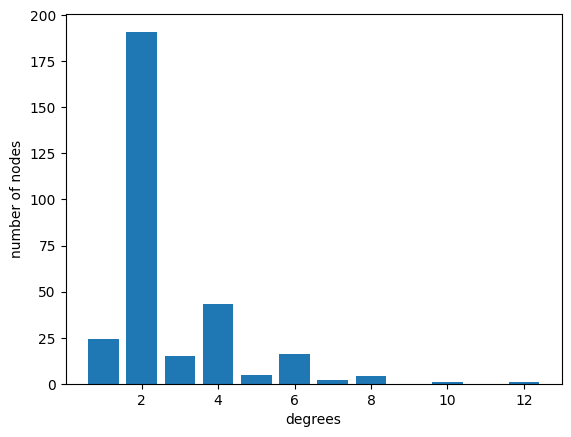

In [110]:
#Runner
class data_runner_formatC():
        def run(self):
                factory = ExtractorMaker()
                format = factory.make('formatC')
                output = format.extract(['id','latitude','longitude'],["station1","station2","time", "line"])
                connections = output[0]

                graph = buildGraph()
                # grapher = degree_grapher()
                for item in connections:
                        edge = Edge(item[0], item[1], item[2], item[3])
                        graph.add_edge(edge)


                #       TESTS
                # # print(graph)
                # sp = djikstra_alg(graph, 11)

                # sp.print_result(11,193)
                # djikstra_alg.print_result
                nodesWithLocation = output[1]
        

                myHeuristic = heuristicType()
                sd = aStar(graph, 11, nodesWithLocation, myHeuristic)

                path = sd.print_result(11,193)
                pathLength = sd.returnTime(193)

                #       ITINERARY TEST
                Itensd = Itinerary(path, pathLength,graph)
                
                sg = djikstra_alg(graph,11)
                path = sg.print_result(11,193)
                Itensg = Itinerary(path, pathLength,graph)
                # print(Itensd.compareConnections(Itensg))

                # print(Itensd.getConnections())
                # print(Itensd._connectionCount)

                # print(Itensg.getConnections())
                # print(Itensg._connectionCount)

                print(graph)
                grapher = degree_grapher()
                max_xaxis = grapher.max_degree(graph)
                grapher.make_graph(graph, max_xaxis)






dataRunner = data_runner_formatC()

dataRunner.run()

DatasetGenerator 

In [111]:
import random

class datasetGen():
    def __init__(self):
        pass

    def getMetrics(self):
        factory = ExtractorMaker()
        format = factory.make('formatC')
        output = format.extract(['id', 'latitude','longitude'], ["station1","station2","time", "line"])
        return output 

    def getNodes(self):
        output = self.getMetrics()
        return output[1]
    
    def getConnections(self):
        output = self.getMetrics()
        return output[0]

    def randomNodes(self):
        nodes = self.getNodes()
        randomNodes = []
        index1 = random.choice(nodes)
        index2 = random.choice(nodes)
        randomNodes = [index1[0], index2[0]]

        return randomNodes
    
    def build(self):
        graph = buildGraph()
        for item in self.getConnections():
                edge = Edge(item[0], item[1], item[2], item[3])
                graph.add_edge(edge)
        
        return graph 

Benchmarking

Dijkstra:  0.004076957702636719
A*:  0.006150722503662109
Dijkstra:  0.04156160354614258
A*:  0.06397438049316406
Dijkstra:  0.2037801742553711
A*:  0.3083469867706299
Dijkstra:  0.4040534496307373
A*:  0.6089465618133545
Dijkstra:  0.7905302047729492
A*:  1.187767505645752
Dijkstra:  1.1828067302703857
A*:  1.6773099899291992


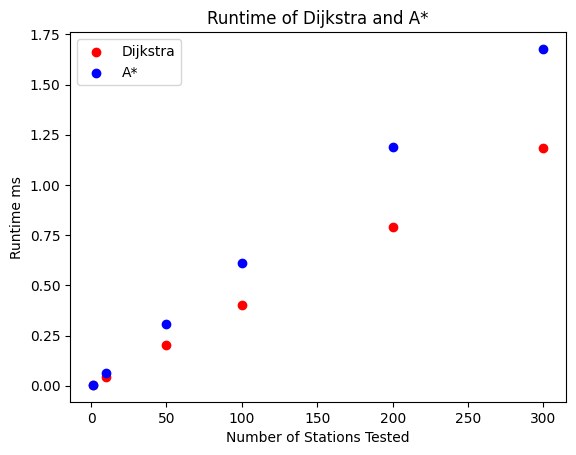

In [112]:
import time 
from matplotlib import pyplot as plt

class benchmark_Setup():
    def __init__(self, algo):
        self.algo = algo 

    def getdataset(self):
        gen = datasetGen()
        dataset = gen.randomNodes()
        
        return dataset 
    
    def benchmarking(self):
        dt = datasetGen()
        graph = dt.build()
        heuristic = heuristicType()
        station = self.getdataset()[0]
        if self.algo == "dijkstra":
            st = time.time()
            algo = djikstra_alg(graph, station)
            end = time.time()
            result = end - st
            return result 

        if self.algo == 'aStar':
            st = time.time()
            algo = aStar(graph, station, dt.getNodes(), heuristic)
            end = time.time()
            result = end - st 
            return result  

def cycle(numOfCycles):
    bench_dij = benchmark_Setup('dijkstra')
    bench_aStar = benchmark_Setup('aStar')
    time1 = 0
    time2 = 0
    for i in range(numOfCycles):
        time1 += bench_dij.benchmarking()
        time2 += bench_aStar.benchmarking()
    return [time1, time2]

def benchmark(valuesToTest):
   
    timeResultsDij = []
    timeResultsAstar = []


    for n in valuesToTest:
        times = cycle(n)
        print("Dijkstra: ",times[0])
        print("A*: ", times[1])
        timeResultsDij.append(times[0])
        timeResultsAstar.append(times[1])
    return [valuesToTest, timeResultsDij, timeResultsAstar]



def GraphResults( valuesToTest, timeResultsDij, timeResultsAstar):
        x_axis = valuesToTest
        y_axis1 = timeResultsDij
        y_axis2 = timeResultsAstar


        plt.xlabel('Number of Stations Tested')         
        plt.ylabel('Runtime ms')   
        plt.scatter(x_axis,y_axis1, color='red',label='Dijkstra')
        plt.scatter(x_axis,y_axis2, color='blue',label='A*')
        plt.legend()
        plt.title('Runtime of Dijkstra and A*')
        plt.show()


benchmarkResults = benchmark([1, 10, 50, 100, 200, 300])
GraphResults(benchmarkResults[0], benchmarkResults[1], benchmarkResults[2])

We found the following best path with a value of 22.
[39.0, 145, 89, 277, 192, 107, 273, 229, 236, 99, 74, 293.0]
We found the following best path with a value of 43.
[181.0, 76, 296, 226, 127, 186, 208, 149, 162, 28, 192, 277, 89, 170, 40, 47, 22, 111, 100, 34, 119, 58.0]
We found the following best path with a value of 23.
[75.0, 210, 291, 115, 178, 202, 282, 94, 254.0]
We found the following best path with a value of 58.
[231.0, 80, 205, 195, 96, 287, 74, 99, 236, 229, 273, 107, 28, 11, 94, 282, 202, 178, 115, 184, 199, 180, 179, 168.0]
We found the following best path with a value of 40.
[205.0, 195, 96, 287, 74, 17, 110, 265, 1, 73, 182, 194, 5, 252, 251, 235, 210, 291.0]
We found the following best path with a value of 17.
[7.0, 145, 90, 104, 11, 83, 193, 278.0]
We found the following best path with a value of 68.
[115.0, 178, 202, 282, 94, 11, 28, 192, 259, 126, 48, 250, 13, 156, 24, 164, 33, 36, 289, 200, 270, 78, 15, 269, 21, 67, 66, 85.0]
We found the following best path with

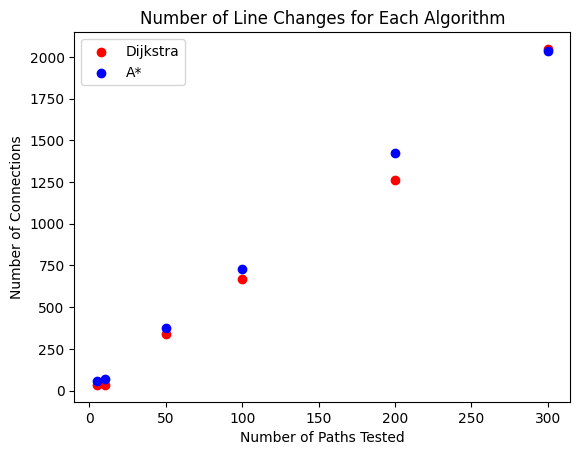

In [113]:
class benchmark_Setup_Itinerary(benchmark_Setup):


    def benchmarking(self):
        dt = datasetGen()
        graph = dt.build()
        heuristic = heuristicType()
        station = self.getdataset()[0]
        station2 = self.getdataset()[1]

        if self.algo == "dijkstra":
            algo = djikstra_alg(graph, station)
            path = algo.print_result(station, station2)
            time = algo.returnTime(station2)
            Itin = Itinerary(path, time, graph)
        
        if self.algo == "aStar":   
            algo2 = aStar(graph, station, dt.getNodes(), heuristic)
            path2 = algo2.print_result(station, station2)
            time2 = algo2.returnTime(station2)
            Itin =Itinerary(path2, time2, graph)
        
        return Itin.countConnections()

#returns the average number of connections for each algorithm
    def cycle(self,numOfCycles):
        bench_dij = benchmark_Setup_Itinerary('dijkstra')
        bench_aStar = benchmark_Setup_Itinerary('aStar')
        ItineraryDij = 0
        ItineraryAstar = 0
        for i in range(numOfCycles):
            ItineraryDij += bench_dij.benchmarking()
            ItineraryAstar += bench_aStar.benchmarking()
        return [ItineraryDij, ItineraryAstar]


    def benchmark2(self,valuesToTest):
        ItinResultsDij = []
        ItinResultsAstar = []
        for n in valuesToTest:
            NumOfConnections = self.cycle(n)
            print("Dijkstra: ",NumOfConnections[0])
            print("A*: ", NumOfConnections[1])
            ItinResultsDij.append(NumOfConnections[0])
            ItinResultsAstar.append(NumOfConnections[1])
        return [valuesToTest, ItinResultsDij, ItinResultsAstar]

    def GraphResults2(self, valuesToTest, ItinResultsDij, ItinResultsAstar):
        x_axis = valuesToTest
        y_axis1 = ItinResultsDij
        y_axis2 = ItinResultsAstar
        plt.xlabel('Number of Paths Tested')         
        plt.ylabel('Number of Connections')   
        plt.scatter(x_axis,y_axis1, color='red',label='Dijkstra')
        plt.scatter(x_axis,y_axis2, color='blue',label='A*')
        plt.legend()
        plt.title('Number of Line Changes for Each Algorithm')
        plt.show()


test = benchmark_Setup_Itinerary('dijkstra')
benchmarkResults = test.benchmark2([5, 10, 50, 100, 200, 300])
test.GraphResults2(benchmarkResults[0], benchmarkResults[1], benchmarkResults[2])